In [1]:
# %load 3_mlp_regu_comp.py
import src.core as mlModule
import src.core_configs as configs

Using TensorFlow backend.


In [2]:
def initTrainPredict(modelList, retrain=False, plot=True, interpol=False):
    # 4. Initiate and train models
    mlModule.initModels(modelList)
    mlModule.trainModels(retrain)

    # 5. Predict
    modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlModule.predictWithModels(
        plot=plot,
        interpol=interpol,
    )

In [3]:
def pred(facility, model, resolution):
    filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig(facility, model, resolution)

    df = mlModule.initDataframe(filename, columns, irrelevantColumns)
    df_train, df_test = mlModule.getTestTrainSplit(traintime, testtime)
    X_train, y_train, X_test, y_test = mlModule.getFeatureTargetSplit(targetColumns)

    mlpr_1_1 = mlModule.MLP('MLP 1x128 1.0'+' mod'+model, layers=[128], l2_rate=1.0, epochs=5000)
    mlpr_1_2 = mlModule.MLP('MLP 1x128 0.5'+' mod'+model, layers=[128], l2_rate=0.5, epochs=5000)
    mlpr_1_3 = mlModule.MLP('MLP 1x128 0.1'+' mod'+model, layers=[128], l2_rate=0.1, epochs=5000)
    mlpr_1_4 = mlModule.MLP('MLP 1x128 0.05'+' mod'+model, layers=[128], l2_rate=0.05, epochs=5000)
    mlpr_1_5 = mlModule.MLP('MLP 1x128 0.01'+' mod'+model, layers=[128], l2_rate=0.01, epochs=5000)
    mlpr_1_6 = mlModule.MLP('MLP 1x128 0.005'+' mod'+model, layers=[128], l2_rate=0.005, epochs=5000)
    mlpr_1_7 = mlModule.MLP('MLP 1x128 0.001'+' mod'+model, layers=[128], l2_rate=0.001, epochs=5000)
    mlpd_1_8 = mlModule.MLP('MLP 1x128 0.2'+' mod'+model, layers=[128], dropout=0.2, epochs=5000)

    linear_r = mlModule.Linear_Regularized('Linear rCV'+' mod'+model)

    initTrainPredict([
            mlpr_1_1, mlpr_1_2, mlpr_1_3, mlpr_1_4, mlpr_1_5, mlpr_1_6, mlpr_1_7, mlpd_1_8, linear_r,
        ])

    initTrainPredict([
            mlpr_1_6, mlpr_1_7, mlpd_1_8, linear_r,
        ])
 

Columns before removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20PT001 - Process Inlet Pressure
Col. 2 : 20FT001 - Process Flow Rate
Col. 3 : 20TT002 - Process Outlet Temperature
Col. 4 : 20PDT001 - Process Pressure Difference
Col. 5 : 50TT001 - Coolant Inlet Temperature
Col. 6 : 50PT001 - Coolant Inlet Pressure
Col. 7 : 50FT001 - Coolant Flow Rate
Col. 8 : 50TT002 - Coolant Outlet Temperature
Col. 9 : 50PDT001 - Coolant Pressure Difference
Col. 10 : 50TV001 - Coolant Valve Opening

Columns after removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20FT001 - Process Flow Rate
Col. 2 : 20TT002 - Process Outlet Temperature
Col. 3 : 50TT001 - Coolant Inlet Temperature
Col. 4 : 50TT002 - Coolant Outlet Temperature

Finding data between 2020-01-01 00:00:00 and 2020-03-20 00:00:00
Found 315 rows

Finding data between 2020-01-01 00:00:00 and 2020-08-01 00:00:00
Found 726 rows

Model MLP 1x128 1.0 modA was loaded from file
Model MLP 1x128 0.5 modA was loaded from fil

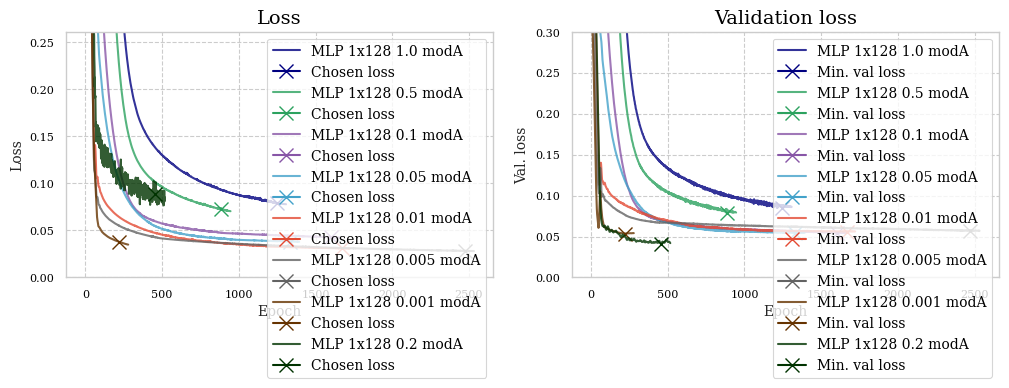

Model prediction scores
+----------------------+-------------+------------+
|        Model         | Train score | Test score |
+----------------------+-------------+------------+
|  MLP 1x128 1.0 modA  |    0.9979   |   0.8738   |
|  MLP 1x128 0.5 modA  |    0.998    |   0.8612   |
|  MLP 1x128 0.1 modA  |    0.9984   |   0.8786   |
| MLP 1x128 0.05 modA  |    0.9984   |   0.7803   |
| MLP 1x128 0.01 modA  |    0.9985   |   0.9002   |
| MLP 1x128 0.005 modA |    0.9986   |   0.8986   |
| MLP 1x128 0.001 modA |    0.9978   |   0.8856   |
|  MLP 1x128 0.2 modA  |    0.9975   |   0.8022   |
|   Linear rCV modA    |    0.9947   |   0.8842   |
+----------------------+-------------+------------+


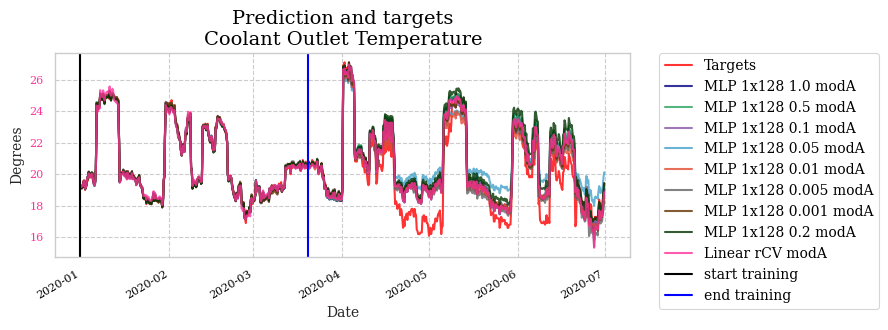

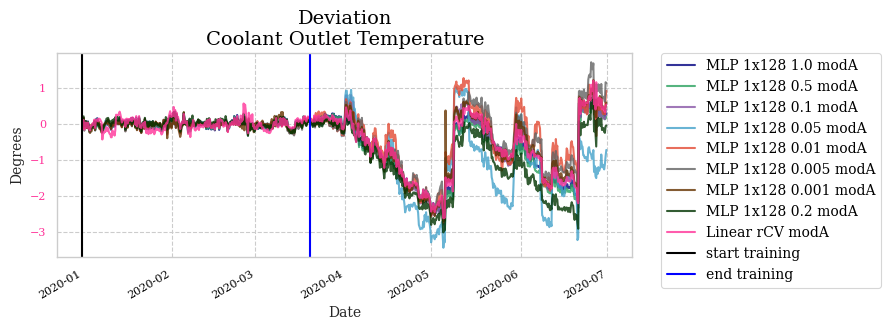

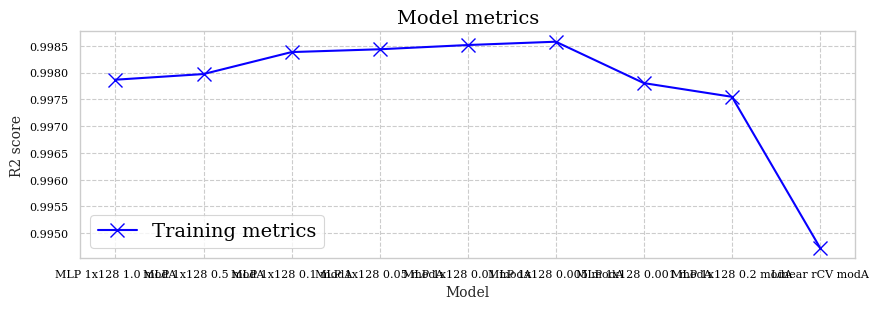

Model MLP 1x128 0.005 modA was loaded from file
Model MLP 1x128 0.001 modA was loaded from file
Model MLP 1x128 0.2 modA was loaded from file
Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[-0.14580221 -0.9826879   0.04136934 -0.0390017 ]]
+----------------------+-----------+-------------+---------------+--------+
|        Model         | Min. loss | Chosen loss | Min. val loss | Epochs |
+----------------------+-----------+-------------+---------------+--------+
| MLP 1x128 0.005 modA |  0.027956 |   0.028335  |    0.056836   |  2534  |
| MLP 1x128 0.001 modA |  0.034868 |   0.037869  |    0.053622   |  280   |
|  MLP 1x128 0.2 modA  |  0.076494 |   0.088153  |    0.041293   |  518   |
+----------------------+-----------+-------------+---------------+--------+


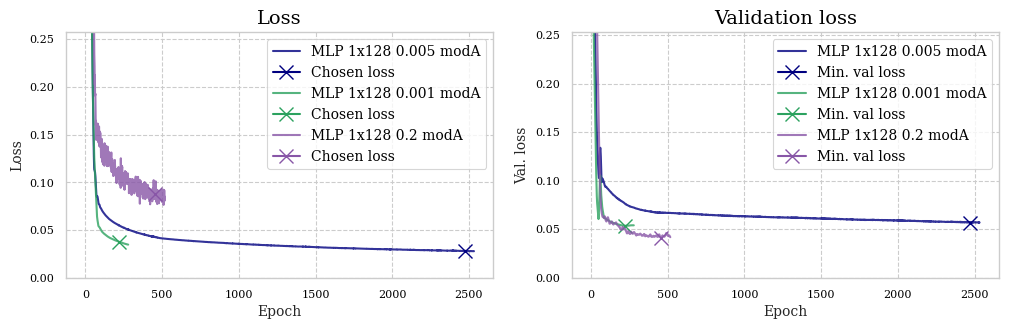

Model prediction scores
+----------------------+-------------+------------+
|        Model         | Train score | Test score |
+----------------------+-------------+------------+
| MLP 1x128 0.005 modA |    0.9986   |   0.8986   |
| MLP 1x128 0.001 modA |    0.9978   |   0.8856   |
|  MLP 1x128 0.2 modA  |    0.9975   |   0.8022   |
|   Linear rCV modA    |    0.9947   |   0.8842   |
+----------------------+-------------+------------+


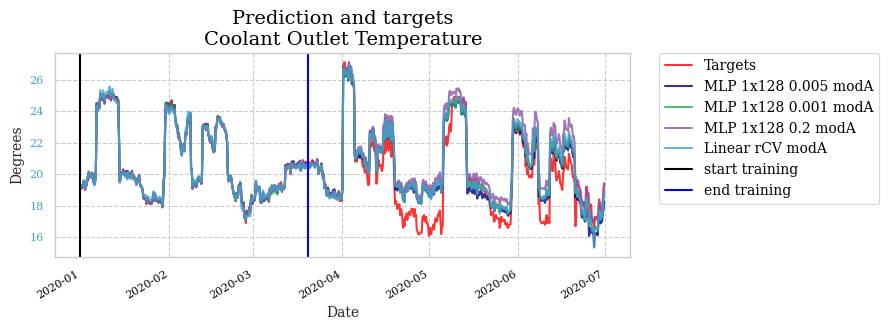

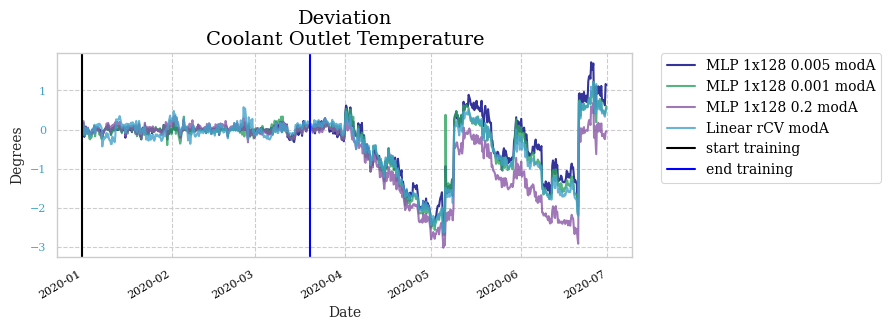

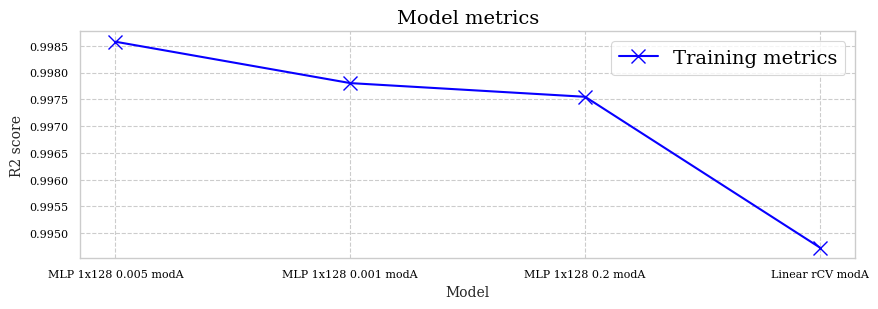

In [4]:
pred('D', 'A', '30min')

In [5]:
mlModule.reset()

Columns before removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20PT001 - Process Inlet Pressure
Col. 2 : 20FT001 - Process Flow Rate
Col. 3 : 20TT002 - Process Outlet Temperature
Col. 4 : 20PDT001 - Process Pressure Difference
Col. 5 : 50TT001 - Coolant Inlet Temperature
Col. 6 : 50PT001 - Coolant Inlet Pressure
Col. 7 : 50FT001 - Coolant Flow Rate
Col. 8 : 50TT002 - Coolant Outlet Temperature
Col. 9 : 50PDT001 - Coolant Pressure Difference
Col. 10 : 50TV001 - Coolant Valve Opening

Columns after removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20FT001 - Process Flow Rate
Col. 2 : 20TT002 - Process Outlet Temperature
Col. 3 : 50TT001 - Coolant Inlet Temperature
Col. 4 : 50TT002 - Coolant Outlet Temperature
Col. 5 : 50TV001 - Coolant Valve Opening

Finding data between 2020-01-01 00:00:00 and 2020-03-20 00:00:00
Found 315 rows

Finding data between 2020-01-01 00:00:00 and 2020-08-01 00:00:00
Found 726 rows

Model MLP 1x128 1.0 modB was loaded from file
Mod

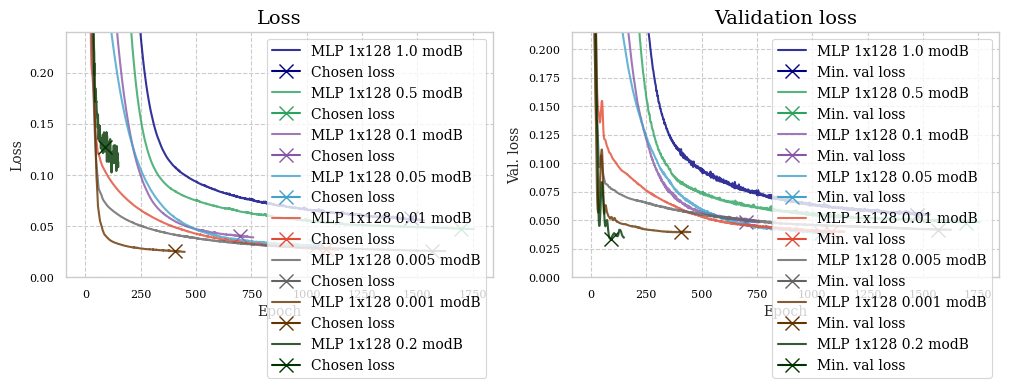

Model prediction scores
+----------------------+-------------+------------+
|        Model         | Train score | Test score |
+----------------------+-------------+------------+
|  MLP 1x128 1.0 modB  |    0.9985   |   0.9157   |
|  MLP 1x128 0.5 modB  |    0.9988   |   0.9247   |
|  MLP 1x128 0.1 modB  |    0.9989   |   0.9429   |
| MLP 1x128 0.05 modB  |    0.9992   |   0.9492   |
| MLP 1x128 0.01 modB  |    0.9993   |   0.9577   |
| MLP 1x128 0.005 modB |    0.9993   |   0.9463   |
| MLP 1x128 0.001 modB |    0.9991   |   0.9281   |
|  MLP 1x128 0.2 modB  |    0.9977   |   0.9218   |
|   Linear rCV modB    |    0.9963   |   0.922    |
+----------------------+-------------+------------+


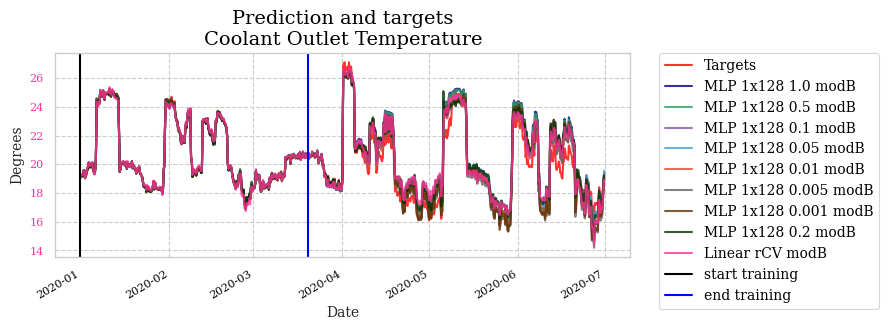

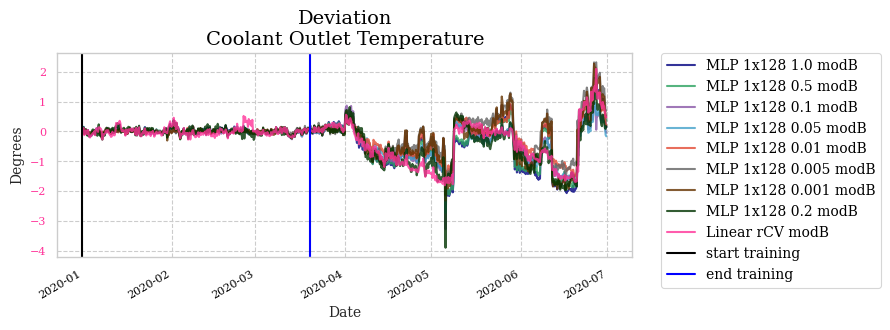

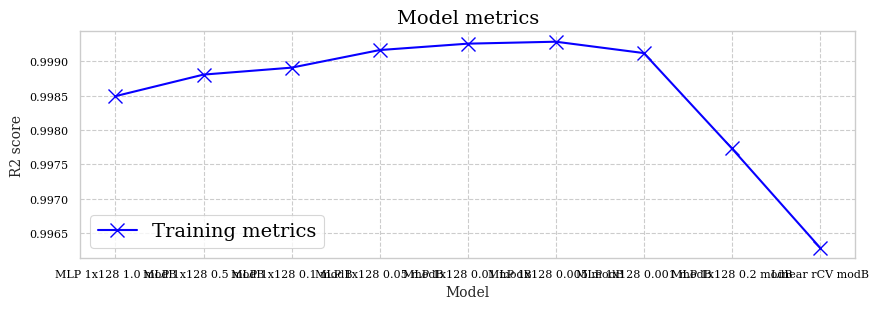

Model MLP 1x128 0.005 modB was loaded from file
Model MLP 1x128 0.001 modB was loaded from file
Model MLP 1x128 0.2 modB was loaded from file
Training model Linear rCV modB
    Trained weights for Linear rCV modB:
[[-0.08654829 -0.81747171  0.03767963 -0.02416356 -0.18159928]]
+----------------------+-----------+-------------+---------------+--------+
|        Model         | Min. loss | Chosen loss | Min. val loss | Epochs |
+----------------------+-----------+-------------+---------------+--------+
| MLP 1x128 0.005 modB |  0.025676 |   0.025947  |    0.041726   |  1627  |
| MLP 1x128 0.001 modB |  0.024992 |   0.025653  |    0.039511   |  450   |
|  MLP 1x128 0.2 modB  |  0.102458 |   0.127554  |    0.033563   |  150   |
+----------------------+-----------+-------------+---------------+--------+


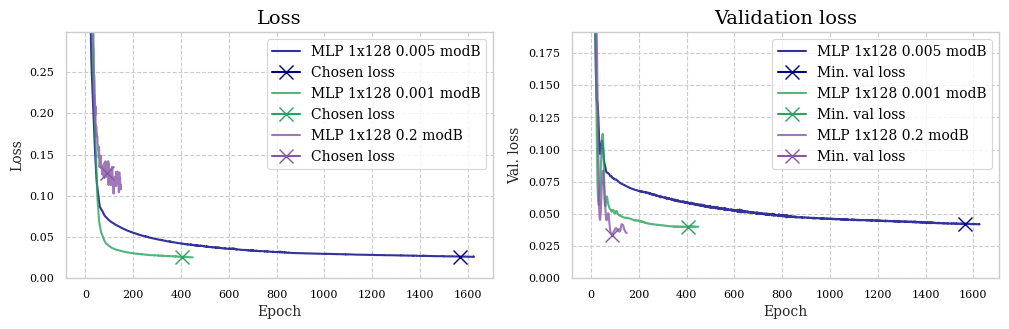

Model prediction scores
+----------------------+-------------+------------+
|        Model         | Train score | Test score |
+----------------------+-------------+------------+
| MLP 1x128 0.005 modB |    0.9993   |   0.9463   |
| MLP 1x128 0.001 modB |    0.9991   |   0.9281   |
|  MLP 1x128 0.2 modB  |    0.9977   |   0.9218   |
|   Linear rCV modB    |    0.9963   |   0.922    |
+----------------------+-------------+------------+


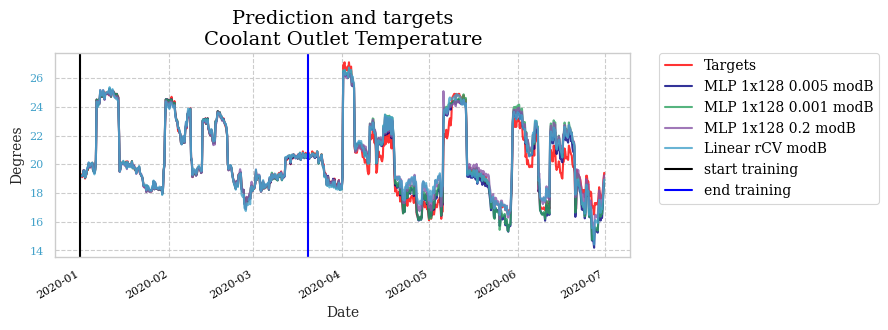

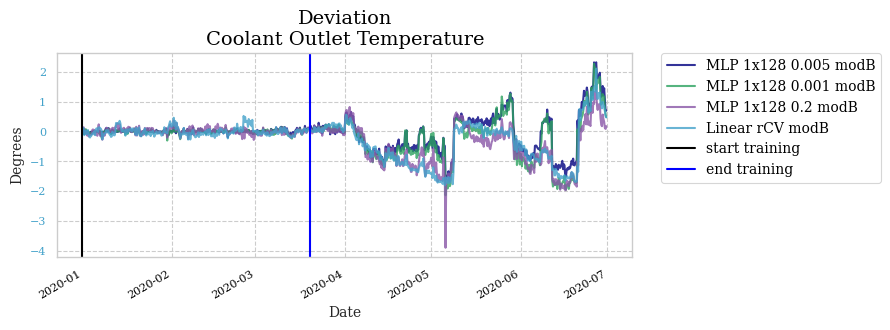

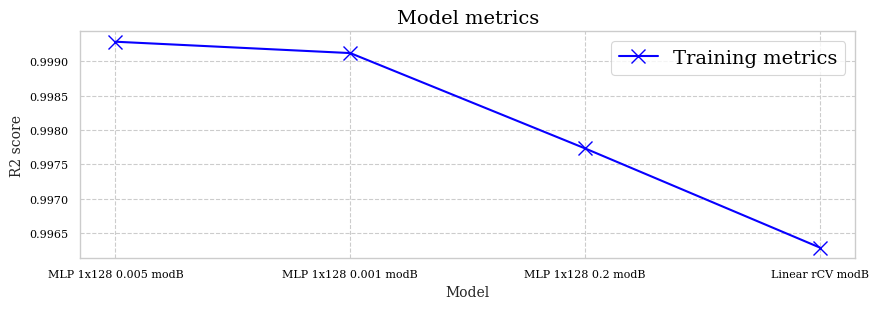

In [6]:
pred('D', 'B', '30min')

In [7]:
mlModule.reset()

Columns before removal: 
Col. 0 : FYN0111 - Process Flow Rate
Col. 1 : TT0102_MA_Y - Process Inlet Temperature A
Col. 2 : TIC0101_CA_YX - Process Outlet Temperature A
Col. 3 : TT0104_MA_Y - Process Inlet Temperature B
Col. 4 : TIC0103_CA_YX - Process Outlet Temperature B
Col. 5 : TT0106_MA_Y - Process Inlet Temperature C
Col. 6 : TIC0105_CA_YX - Process Outlet Temperature C
Col. 7 : PDT0108_MA_Y - Process A Pressure Difference
Col. 8 : PDT0119_MA_Y - Process B Pressure Difference
Col. 9 : PDT0118_MA_Y - Process C Pressure Difference
Col. 10 : PIC0104_CA_YX - Separator Inlet Pressure
Col. 11 : TIC0425_CA_YX - Coolant Inlet Temperature
Col. 12 : TT0651_MA_Y - Coolant Outlet Temperature A
Col. 13 : TT0652_MA_Y - Coolant Outlet Temperature B
Col. 14 : TT0653_MA_Y - Coolant Outlet Temperature C
Col. 15 : TIC0101_CA_Y - Coolant Valve Opening A
Col. 16 : TIC0103_CA_Y - Coolant Valve Opening B
Col. 17 : TIC0105_CA_Y - Coolant Valve Opening C

Columns after removal: 
Col. 0 : FYN0111 - Process 

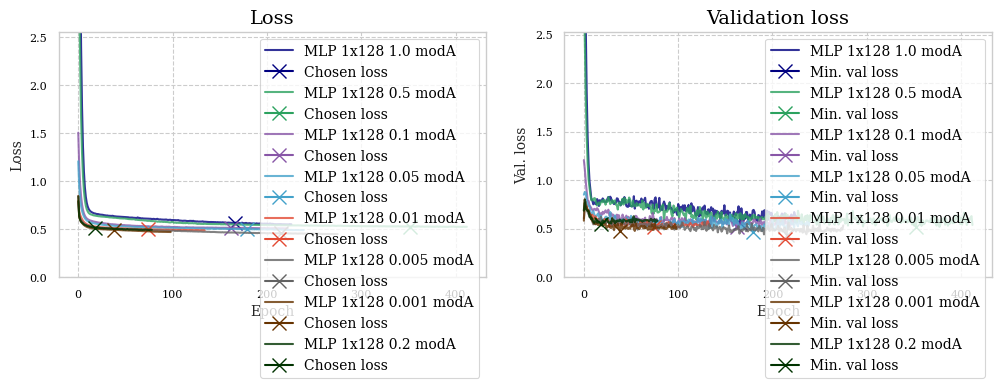

Model prediction scores
+----------------------+-------------+------------+
|        Model         | Train score | Test score |
+----------------------+-------------+------------+
|  MLP 1x128 1.0 modA  |    0.4178   |   0.2656   |
|  MLP 1x128 0.5 modA  |    0.4431   |    0.32    |
|  MLP 1x128 0.1 modA  |    0.4507   |   0.2773   |
| MLP 1x128 0.05 modA  |    0.4907   |   0.2029   |
| MLP 1x128 0.01 modA  |    0.4653   |   0.0732   |
| MLP 1x128 0.005 modA |    0.565    |  -0.4191   |
| MLP 1x128 0.001 modA |    0.4751   |   0.1751   |
|  MLP 1x128 0.2 modA  |    0.4375   |  -0.0309   |
|   Linear rCV modA    |    0.3234   |   0.0673   |
+----------------------+-------------+------------+


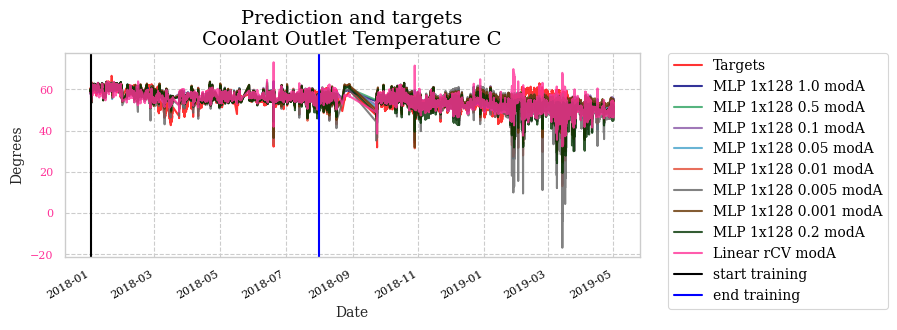

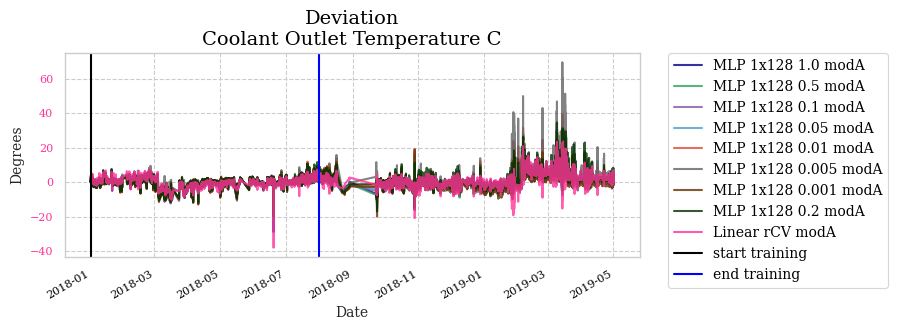

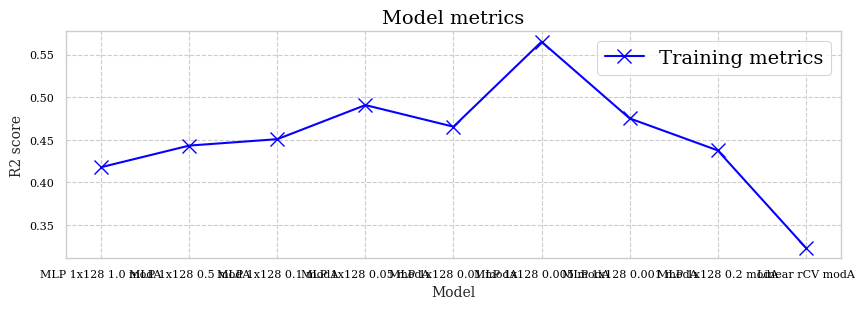

Model MLP 1x128 0.005 modA was loaded from file
Model MLP 1x128 0.001 modA was loaded from file
Model MLP 1x128 0.2 modA was loaded from file
Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[-0.22721561  0.45067128  0.35950102 -0.0655235 ]]
+----------------------+-----------+-------------+---------------+--------+
|        Model         | Min. loss | Chosen loss | Min. val loss | Epochs |
+----------------------+-----------+-------------+---------------+--------+
| MLP 1x128 0.005 modA |  0.451687 |   0.461345  |    0.439037   |  276   |
| MLP 1x128 0.001 modA |  0.472993 |   0.495721  |    0.478324   |   99   |
|  MLP 1x128 0.2 modA  |  0.493243 |   0.517274  |    0.548077   |   79   |
+----------------------+-----------+-------------+---------------+--------+


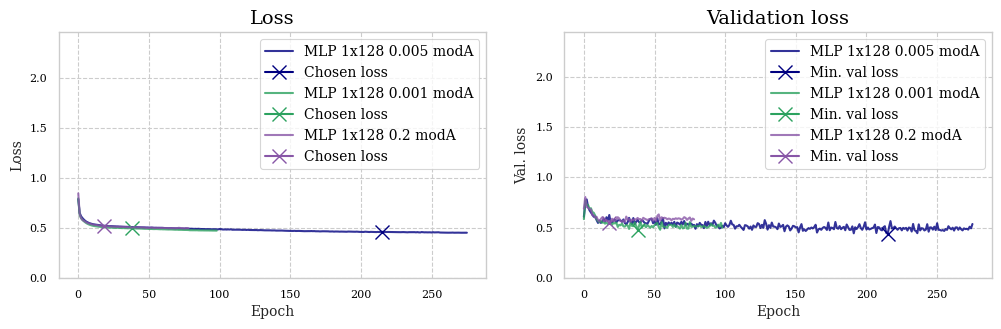

Model prediction scores
+----------------------+-------------+------------+
|        Model         | Train score | Test score |
+----------------------+-------------+------------+
| MLP 1x128 0.005 modA |    0.565    |  -0.4191   |
| MLP 1x128 0.001 modA |    0.4751   |   0.1751   |
|  MLP 1x128 0.2 modA  |    0.4375   |  -0.0309   |
|   Linear rCV modA    |    0.3234   |   0.0673   |
+----------------------+-------------+------------+


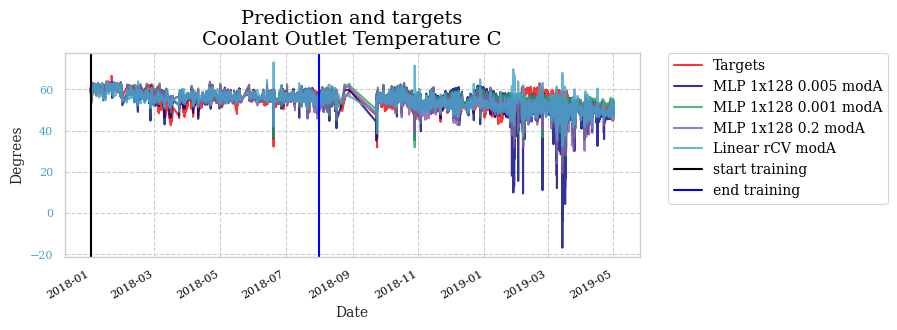

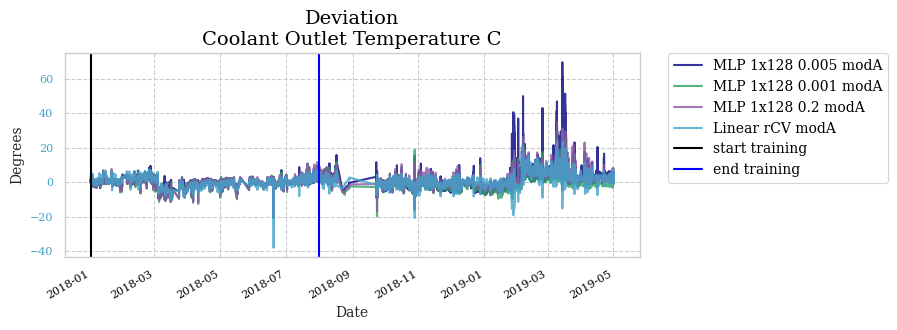

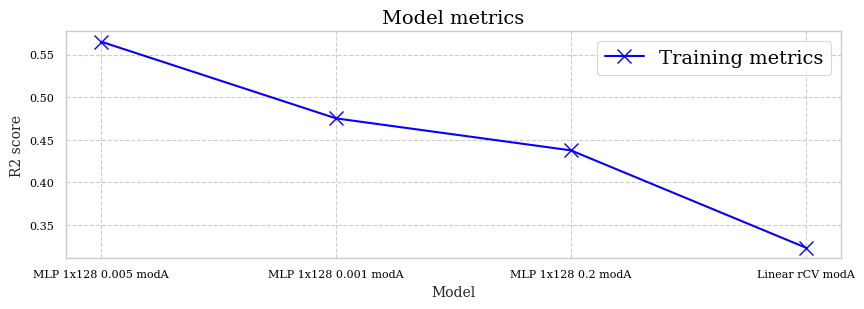

In [8]:
pred('F', 'A', '30min')

In [9]:
mlModule.reset()

Columns before removal: 
Col. 0 : FYN0111 - Process Flow Rate
Col. 1 : TT0102_MA_Y - Process Inlet Temperature A
Col. 2 : TIC0101_CA_YX - Process Outlet Temperature A
Col. 3 : TT0104_MA_Y - Process Inlet Temperature B
Col. 4 : TIC0103_CA_YX - Process Outlet Temperature B
Col. 5 : TT0106_MA_Y - Process Inlet Temperature C
Col. 6 : TIC0105_CA_YX - Process Outlet Temperature C
Col. 7 : PDT0108_MA_Y - Process A Pressure Difference
Col. 8 : PDT0119_MA_Y - Process B Pressure Difference
Col. 9 : PDT0118_MA_Y - Process C Pressure Difference
Col. 10 : PIC0104_CA_YX - Separator Inlet Pressure
Col. 11 : TIC0425_CA_YX - Coolant Inlet Temperature
Col. 12 : TT0651_MA_Y - Coolant Outlet Temperature A
Col. 13 : TT0652_MA_Y - Coolant Outlet Temperature B
Col. 14 : TT0653_MA_Y - Coolant Outlet Temperature C
Col. 15 : TIC0101_CA_Y - Coolant Valve Opening A
Col. 16 : TIC0103_CA_Y - Coolant Valve Opening B
Col. 17 : TIC0105_CA_Y - Coolant Valve Opening C

Columns after removal: 
Col. 0 : FYN0111 - Process 

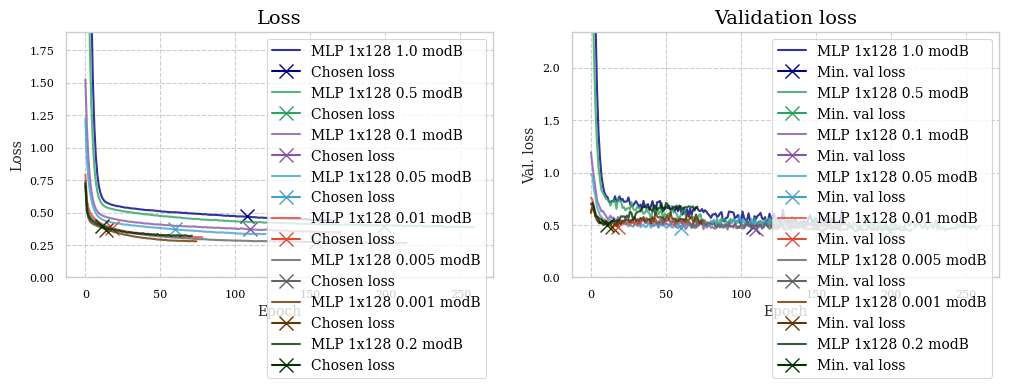

Model prediction scores
+----------------------+-------------+------------+
|        Model         | Train score | Test score |
+----------------------+-------------+------------+
|  MLP 1x128 1.0 modB  |    0.6784   |   0.6249   |
|  MLP 1x128 0.5 modB  |    0.736    |   0.5019   |
|  MLP 1x128 0.1 modB  |    0.7561   |   0.6117   |
| MLP 1x128 0.05 modB  |    0.7584   |   0.6028   |
| MLP 1x128 0.01 modB  |    0.7448   |   0.5546   |
| MLP 1x128 0.005 modB |    0.8266   |  -0.0275   |
| MLP 1x128 0.001 modB |    0.7274   |   0.553    |
|  MLP 1x128 0.2 modB  |    0.7135   |   0.4499   |
|   Linear rCV modB    |    0.6158   |   0.5949   |
+----------------------+-------------+------------+


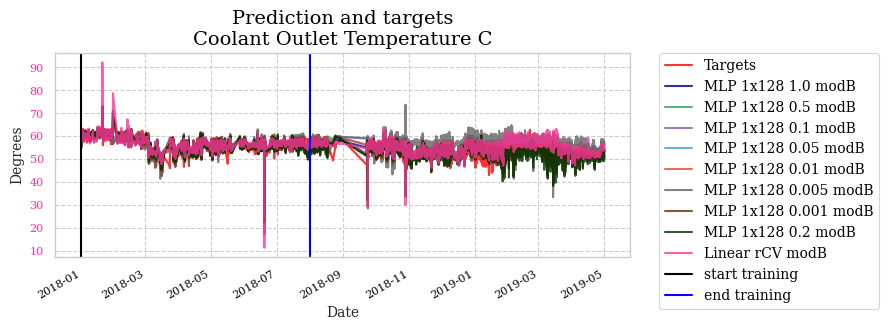

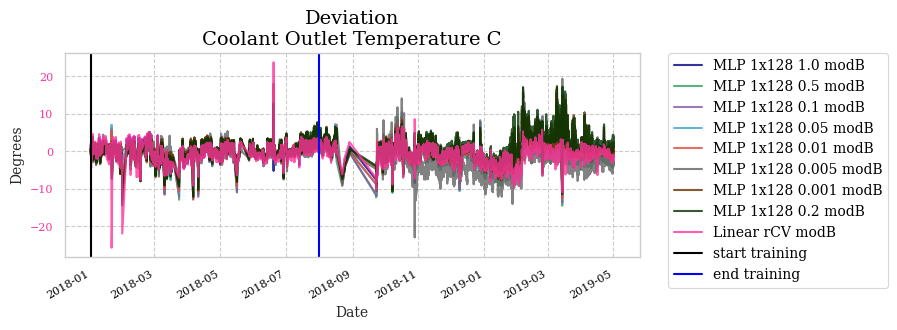

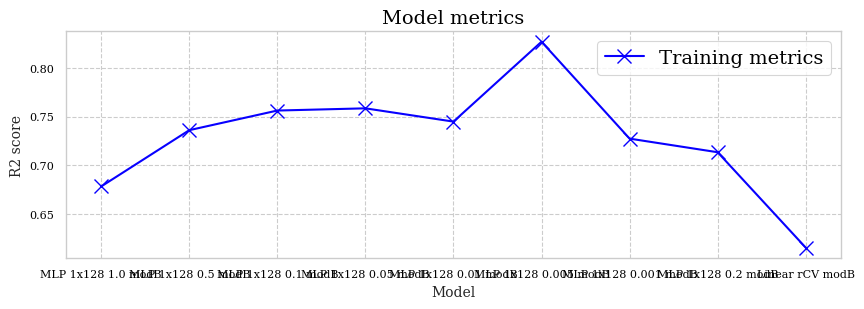

Model MLP 1x128 0.005 modB was loaded from file
Model MLP 1x128 0.001 modB was loaded from file
Model MLP 1x128 0.2 modB was loaded from file
Training model Linear rCV modB
    Trained weights for Linear rCV modB:
[[ 0.51770724  0.35863995  0.17792243  0.00887577 -0.97750831]]
+----------------------+-----------+-------------+---------------+--------+
|        Model         | Min. loss | Chosen loss | Min. val loss | Epochs |
+----------------------+-----------+-------------+---------------+--------+
| MLP 1x128 0.005 modB |  0.26523  |   0.27458   |    0.440483   |  215   |
| MLP 1x128 0.001 modB |  0.278302 |   0.369001  |    0.477106   |   75   |
|  MLP 1x128 0.2 modB  |  0.318642 |   0.393734  |    0.499852   |   72   |
+----------------------+-----------+-------------+---------------+--------+


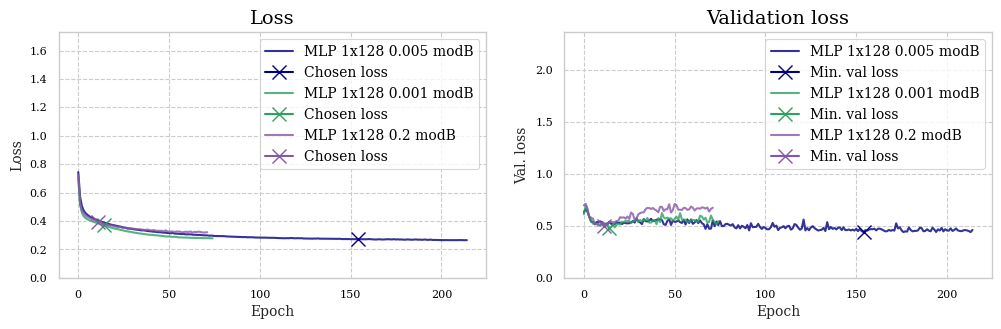

Model prediction scores
+----------------------+-------------+------------+
|        Model         | Train score | Test score |
+----------------------+-------------+------------+
| MLP 1x128 0.005 modB |    0.8266   |  -0.0275   |
| MLP 1x128 0.001 modB |    0.7274   |   0.553    |
|  MLP 1x128 0.2 modB  |    0.7135   |   0.4499   |
|   Linear rCV modB    |    0.6158   |   0.5949   |
+----------------------+-------------+------------+


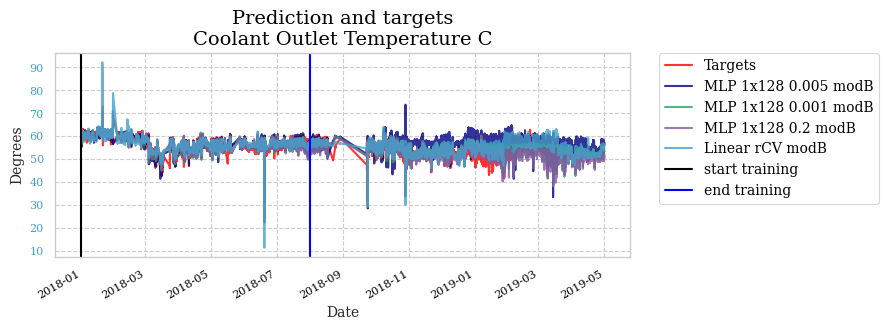

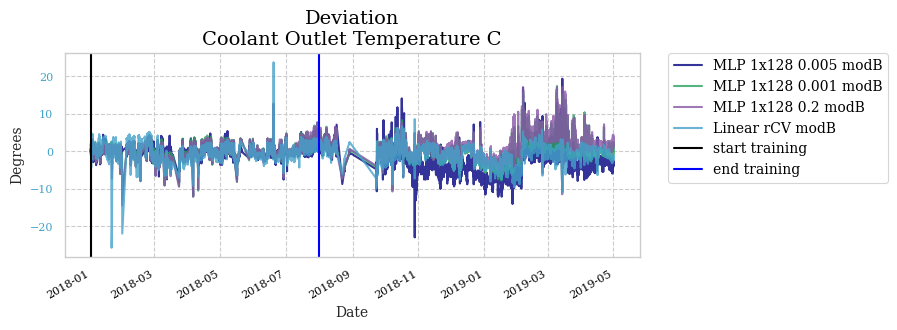

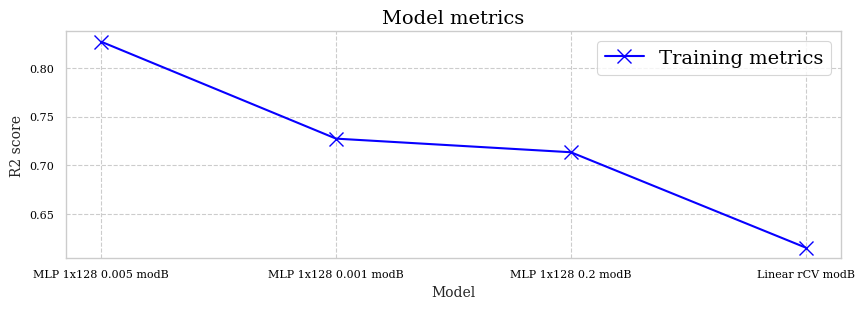

In [10]:
pred('F', 'B', '30min')

In [11]:
mlModule.reset()

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : TI0066 - Process Outlet Temperature
Col. 1 : TZI0012 - Process Inlet Temperature
Col. 2 : FI0010 - Process Flow Rate
Col. 3 : TT0025 - Coolant Inlet Temperature
Col. 4 : TT0026 - Coolant Outlet Temperature

Finding data between 2019-04-24 00:00:00 and 2019-08-01 00:00:00
Found 4232 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 49290 rows

Model MLP 1x128 1.0 modA was loaded from file
Model MLP 1x128 0.5 modA was loaded from file
Model MLP 1x128 0.1 modA was loaded from file
Mod

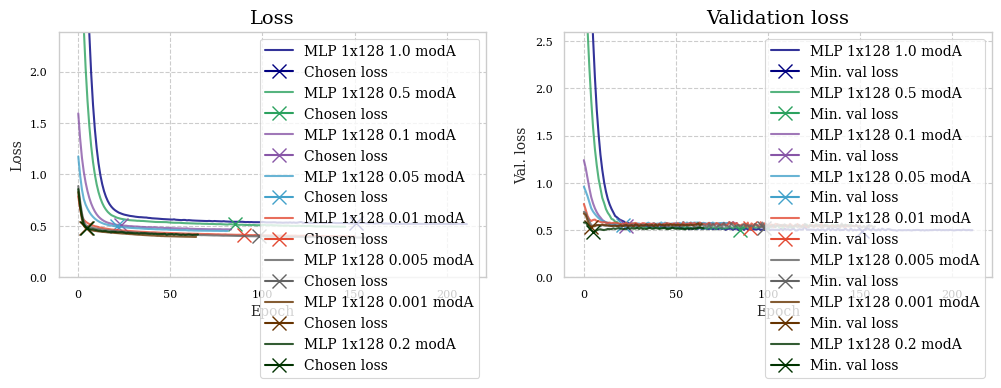

Model prediction scores
+----------------------+-------------+------------+
|        Model         | Train score | Test score |
+----------------------+-------------+------------+
|  MLP 1x128 1.0 modA  |    0.5788   |  -1.3968   |
|  MLP 1x128 0.5 modA  |    0.5983   |  -1.5764   |
|  MLP 1x128 0.1 modA  |     0.61    |  -1.5047   |
| MLP 1x128 0.05 modA  |    0.6213   |  -1.3701   |
| MLP 1x128 0.01 modA  |    0.6899   |  -2.4435   |
| MLP 1x128 0.005 modA |    0.7009   |  -2.4789   |
| MLP 1x128 0.001 modA |    0.5997   |  -1.0038   |
|  MLP 1x128 0.2 modA  |    0.6094   |  -0.7275   |
|   Linear rCV modA    |    0.562    |  -1.2036   |
+----------------------+-------------+------------+


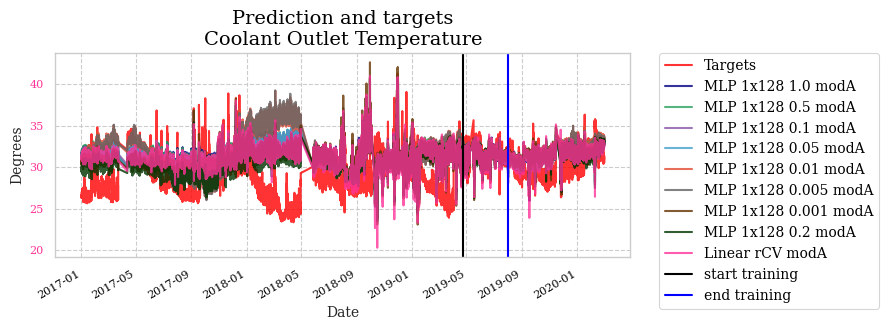

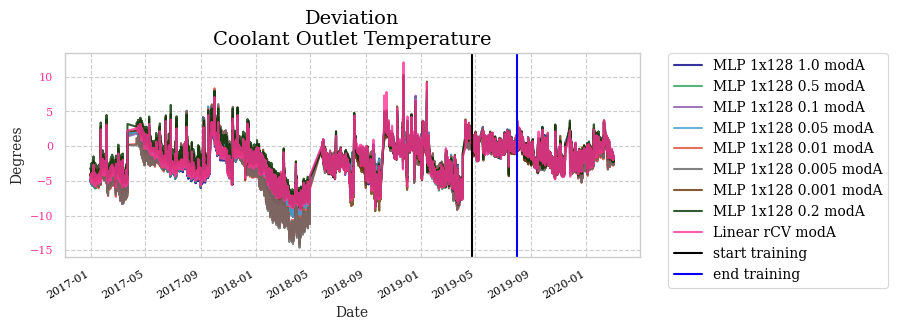

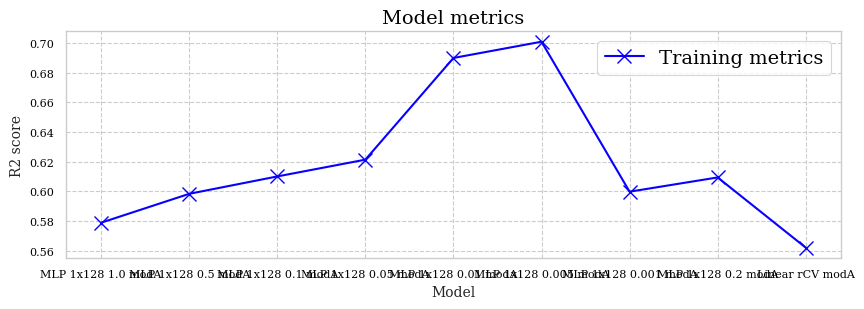

Model MLP 1x128 0.005 modA was loaded from file
Model MLP 1x128 0.001 modA was loaded from file
Model MLP 1x128 0.2 modA was loaded from file
Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[ 0.26106655 -0.18036607 -0.74340497 -0.26854008]]
+----------------------+-----------+-------------+---------------+--------+
|        Model         | Min. loss | Chosen loss | Min. val loss | Epochs |
+----------------------+-----------+-------------+---------------+--------+
| MLP 1x128 0.005 modA |  0.387125 |   0.399331  |    0.520577   |  159   |
| MLP 1x128 0.001 modA |  0.393772 |   0.479163  |    0.538733   |   65   |
|  MLP 1x128 0.2 modA  |  0.413166 |   0.482752  |    0.483311   |   66   |
+----------------------+-----------+-------------+---------------+--------+


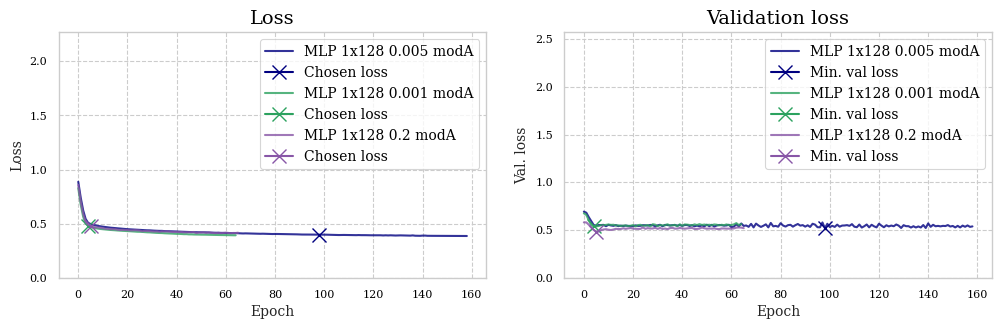

Model prediction scores
+----------------------+-------------+------------+
|        Model         | Train score | Test score |
+----------------------+-------------+------------+
| MLP 1x128 0.005 modA |    0.7009   |  -2.4789   |
| MLP 1x128 0.001 modA |    0.5997   |  -1.0038   |
|  MLP 1x128 0.2 modA  |    0.6094   |  -0.7275   |
|   Linear rCV modA    |    0.562    |  -1.2036   |
+----------------------+-------------+------------+


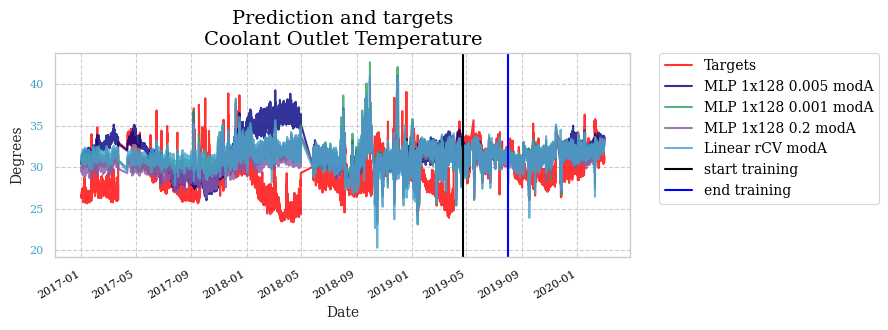

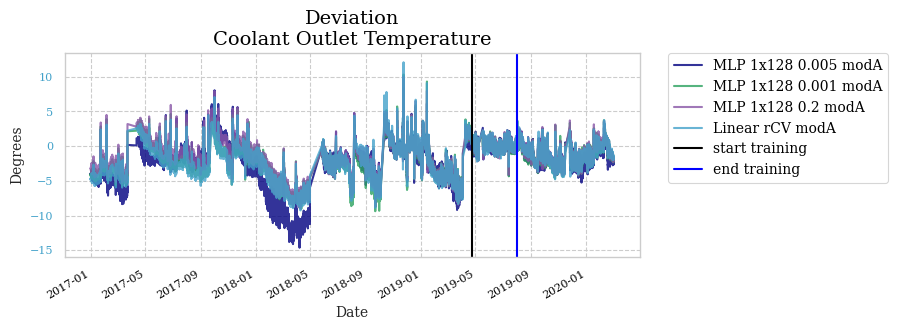

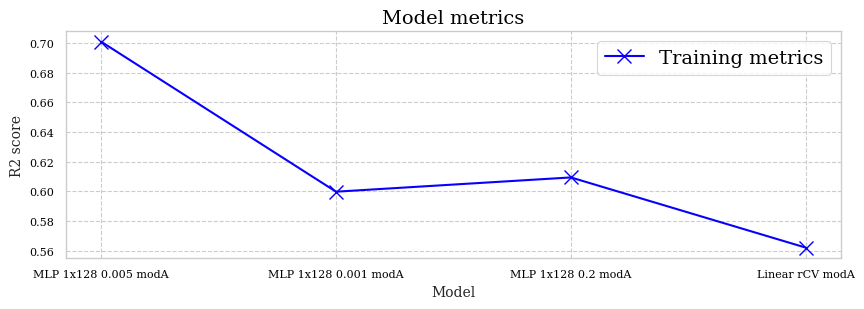

In [12]:
pred('G', 'A', '30min')

In [13]:
mlModule.reset()

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : TI0066 - Process Outlet Temperature
Col. 1 : TZI0012 - Process Inlet Temperature
Col. 2 : FI0010 - Process Flow Rate
Col. 3 : TT0025 - Coolant Inlet Temperature
Col. 4 : TT0026 - Coolant Outlet Temperature
Col. 5 : TIC0022U - Coolant Valve Opening

Finding data between 2019-04-24 00:00:00 and 2019-08-01 00:00:00
Found 4232 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 49290 rows

Model MLP 1x128 1.0 modB was loaded from file
Model MLP 1x128 0.5 modB was loaded from file
Model M

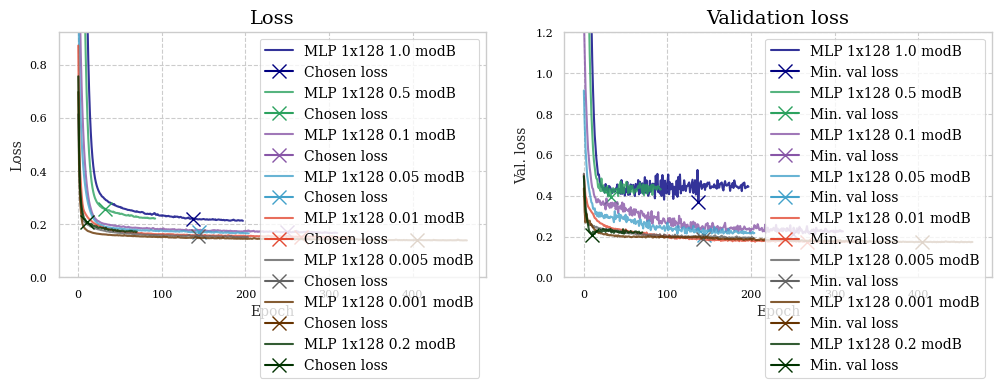

Model prediction scores
+----------------------+-------------+------------+
|        Model         | Train score | Test score |
+----------------------+-------------+------------+
|  MLP 1x128 1.0 modB  |    0.9163   |   -0.996   |
|  MLP 1x128 0.5 modB  |    0.9088   |  -0.3699   |
|  MLP 1x128 0.1 modB  |    0.9445   |  -1.0887   |
| MLP 1x128 0.05 modB  |    0.943    |  -1.0168   |
| MLP 1x128 0.01 modB  |    0.9538   |  -1.4614   |
| MLP 1x128 0.005 modB |    0.9516   |  -1.5565   |
| MLP 1x128 0.001 modB |    0.956    |  -1.0039   |
|  MLP 1x128 0.2 modB  |    0.9372   |  -1.2444   |
|   Linear rCV modB    |    0.9235   |  -2.2699   |
+----------------------+-------------+------------+


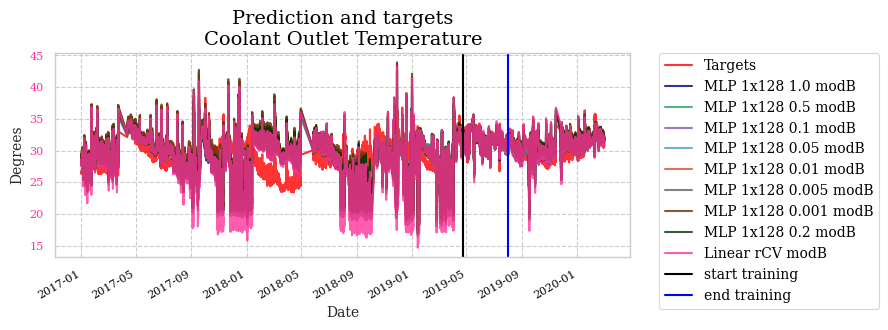

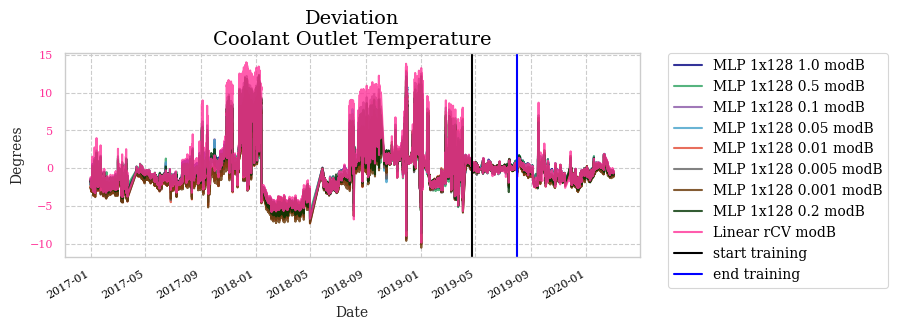

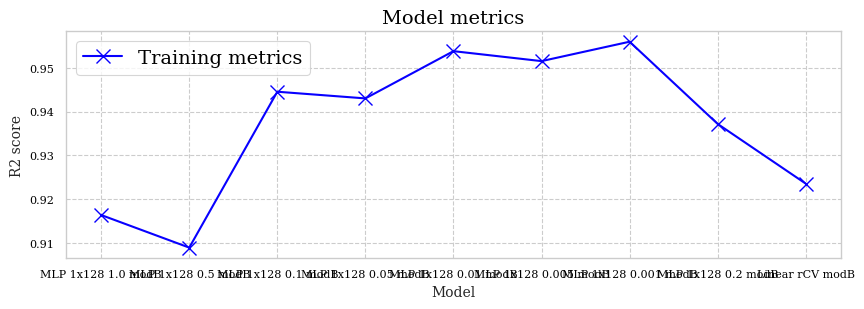

Model MLP 1x128 0.005 modB was loaded from file
Model MLP 1x128 0.001 modB was loaded from file
Model MLP 1x128 0.2 modB was loaded from file
Training model Linear rCV modB
    Trained weights for Linear rCV modB:
[[ 0.28096044  0.0664614   0.01515006  0.00403552 -0.94254971]]
+----------------------+-----------+-------------+---------------+--------+
|        Model         | Min. loss | Chosen loss | Min. val loss | Epochs |
+----------------------+-----------+-------------+---------------+--------+
| MLP 1x128 0.005 modB |  0.151492 |   0.155341  |    0.187061   |  204   |
| MLP 1x128 0.001 modB |  0.139203 |   0.140257  |    0.172067   |  466   |
|  MLP 1x128 0.2 modB  |  0.170965 |   0.206557  |    0.209786   |   71   |
+----------------------+-----------+-------------+---------------+--------+


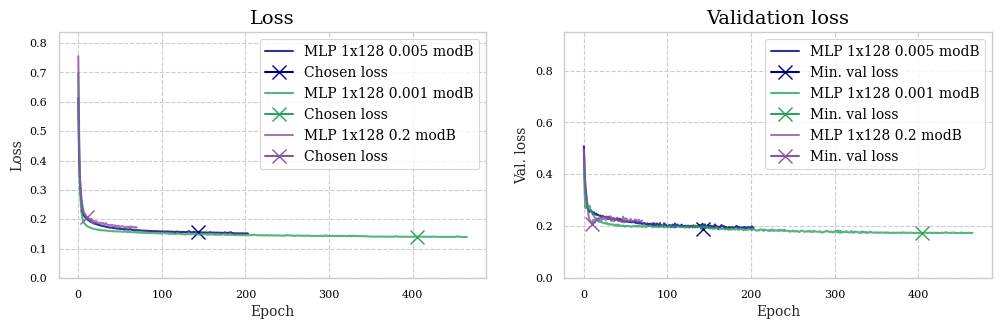

Model prediction scores
+----------------------+-------------+------------+
|        Model         | Train score | Test score |
+----------------------+-------------+------------+
| MLP 1x128 0.005 modB |    0.9516   |  -1.5565   |
| MLP 1x128 0.001 modB |    0.956    |  -1.0039   |
|  MLP 1x128 0.2 modB  |    0.9372   |  -1.2444   |
|   Linear rCV modB    |    0.9235   |  -2.2699   |
+----------------------+-------------+------------+


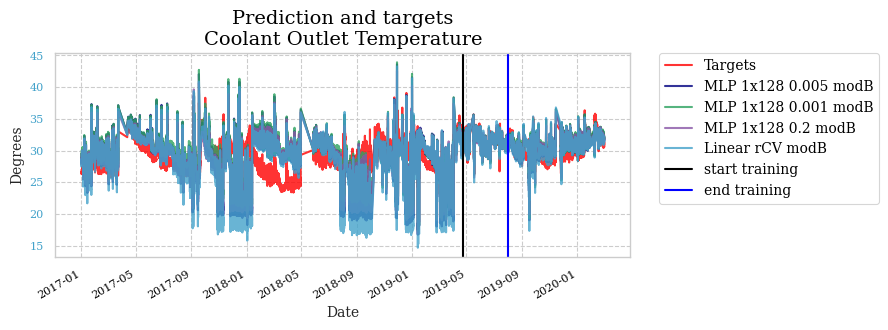

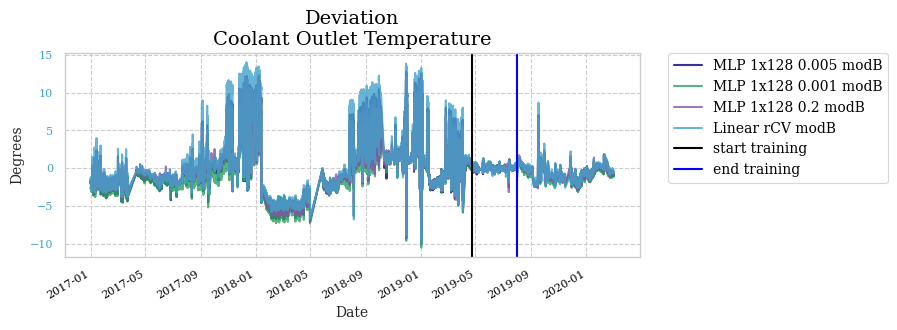

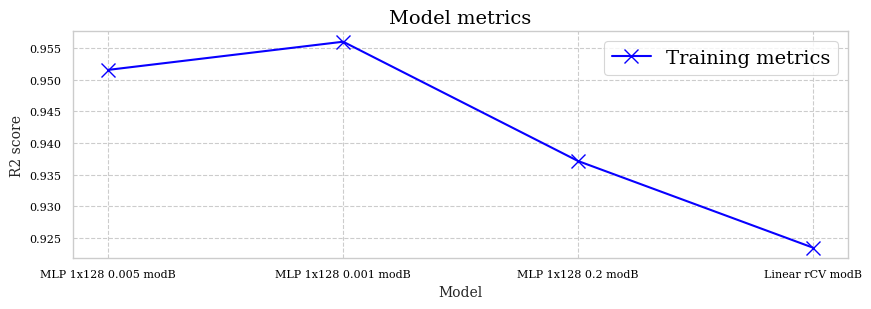

In [14]:
pred('G', 'B', '30min')

In [15]:
mlModule.reset()